In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from plot_keypoints import show_keypoints

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [16]:
fb_data = pd.read_csv('data/full_body.csv')

In [17]:
regressor = LinearRegression()
imputer = IterativeImputer(estimator=regressor, random_state=42)
imputed = imputer.fit(fb_data)

In [18]:
#import pickle

#with open('models/iterative_imputer_model.pkl', 'wb') as file:
#    pickle.dump(imputed, file)

In [19]:
test_keypoints = np.array([
 [1.08335e+03, 4.65100e+01],
 [1.08649e+03, 4.22700e+01],
 [1.07788e+03, 4.23200e+01],
 [0.00000e+00, 0.00000e+00],
 [1.06676e+03, 4.68600e+01],
 [1.09072e+03, 7.41500e+01],
 [1.04947e+03, 7.13300e+01],
 [1.09138e+03, 1.07290e+02],
 [1.03210e+03, 1.06850e+02],
 [0.00000e+00, 0.00000e+00],
 [1.05911e+03, 9.00600e+01],
 [1.07478e+03, 1.38350e+02],
 [1.04769e+03, 1.35200e+02],
 [1.06151e+03, 1.88150e+02],
 [1.04345e+03, 1.86320e+02],
 [1.05525e+03, 2.29110e+02],
 [1.03983e+03, 2.31220e+02]
])

In [20]:
test_keypoints = np.where(test_keypoints <= 0, np.nan, test_keypoints)
keypoints = test_keypoints.reshape(-1,34)
df_keypoints = pd.DataFrame(keypoints, columns=fb_data.columns)
df_keypoints

,nose_x,nose_y,left_eye_x,left_eye_y,right_eye_x,right_eye_y,left_ear_x,left_ear_y,right_ear_x,right_ear_y,...,right_hip_x,right_hip_y,left_knee_x,left_knee_y,right_knee_x,right_knee_y,left_ankle_x,left_ankle_y,right_ankle_x,right_ankle_y
0,1083.35,46.51,1086.49,42.27,1077.88,42.32,NaN,NaN,1066.76,46.86,...,1047.69,135.2,1061.51,188.15,1043.45,186.32,1055.25,229.11,1039.83,231.22


In [21]:
imputed_keypoints = imputed.transform(df_keypoints)
imputed_keypoints

array([[1083.35      ,   46.51      , 1086.49      ,   42.27      ,
        1077.88      ,   42.32      , 1085.81131234,   46.85448382,
        1066.76      ,   46.86      , 1090.72      ,   74.15      ,
        1049.47      ,   71.33      , 1091.38      ,  107.29      ,
        1032.1       ,  106.85      , 1099.88862829,  119.61447198,
        1059.11      ,   90.06      , 1074.78      ,  138.35      ,
        1047.69      ,  135.2       , 1061.51      ,  188.15      ,
        1043.45      ,  186.32      , 1055.25      ,  229.11      ,
        1039.83      ,  231.22      ]])

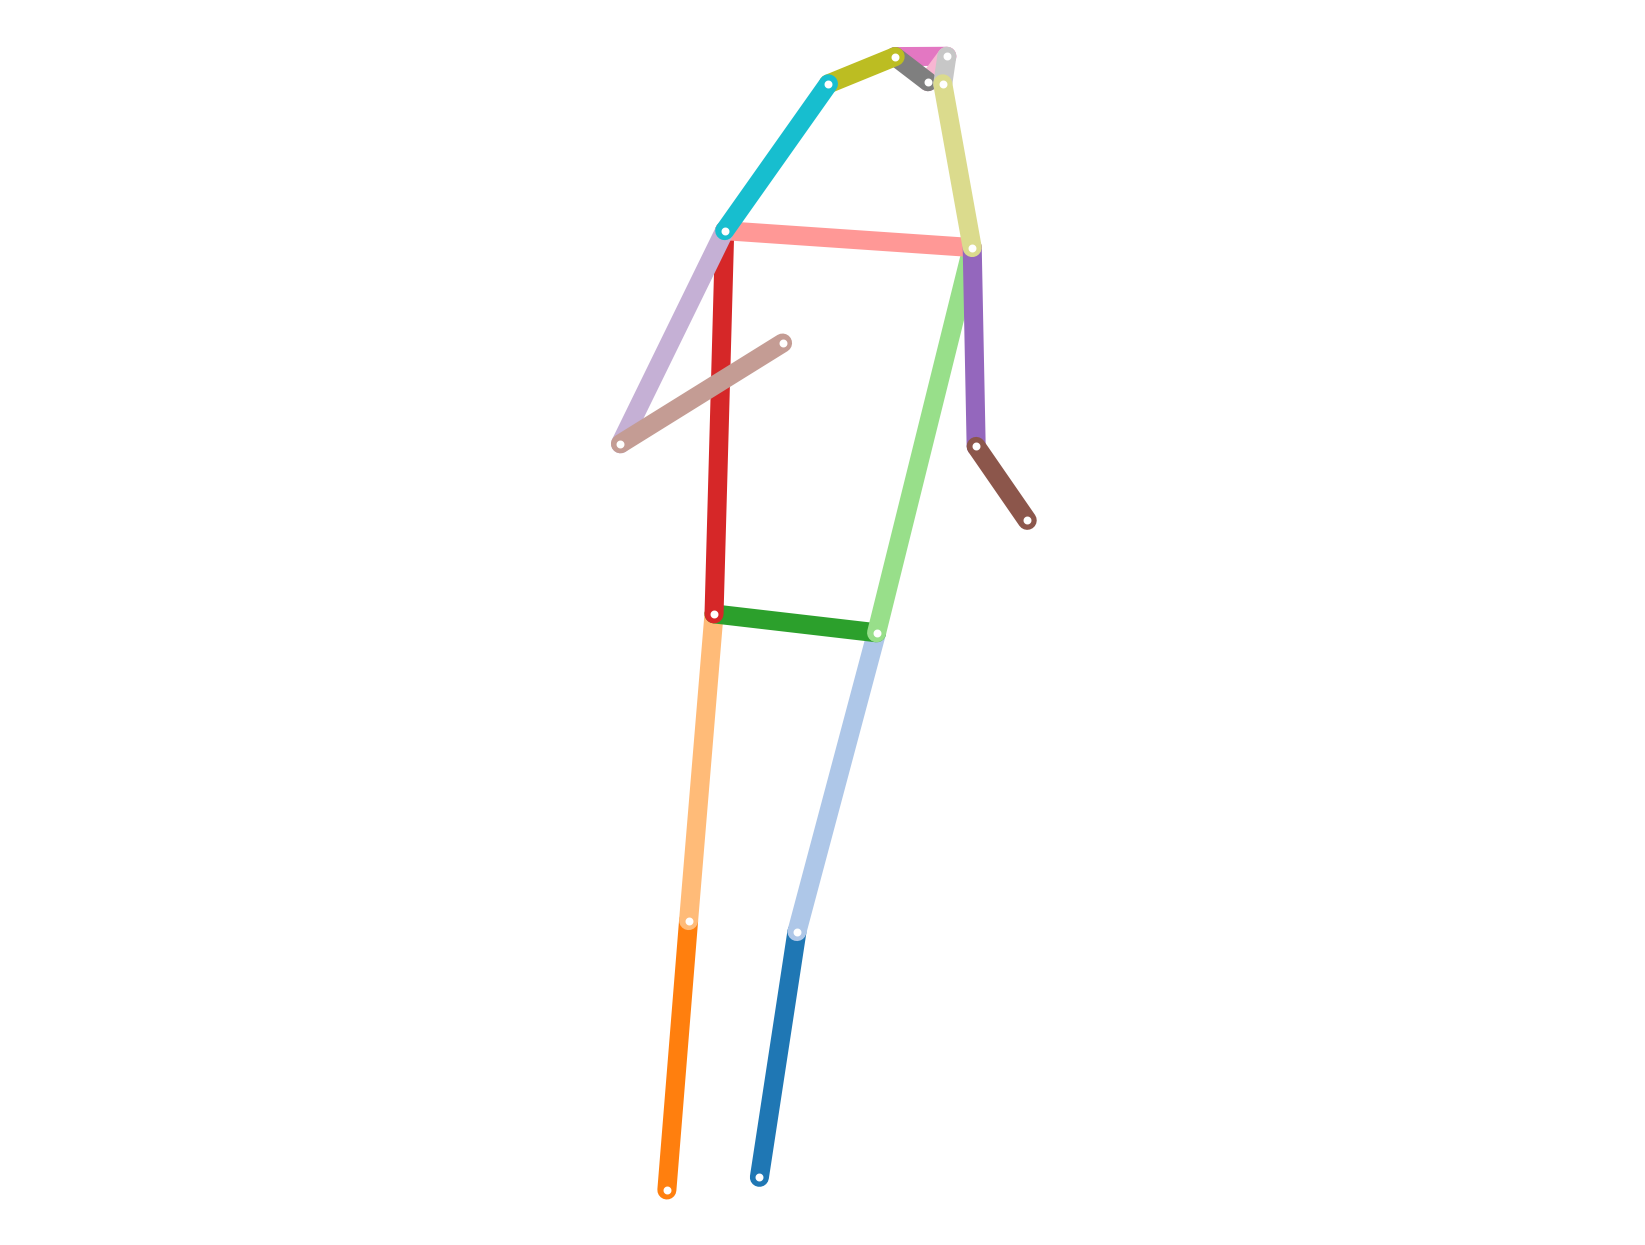

In [22]:
imputed_keypoints = imputed_keypoints.reshape(17,2)
show_keypoints(imputed_keypoints)